In [1]:
#Name:Fuwei Huang
#Date:12/07/2020
#The code below are written to detect obama faces base with faceCascade in python3

In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
import argparse
import glob
import imutils
from PIL import Image
%matplotlib inline

In [3]:
print(cv2.__file__)

D:\Anaconda\lib\site-packages\cv2\cv2.cp38-win_amd64.pyd


In [4]:
#  Location and loading Face Cascade XML
OPENCV_PATH = "D:\\Anaconda\\Lib\\site-packages\\cv2\\data"
faceXML = os.path.join(OPENCV_PATH,'haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(faceXML)

#Declear dir and path list
baseDir = "C:\\Users\\Huang\\Desktop\\FaceData"
folderList = ['A','B','C','D','E','Test']
obamafolder= ['ObamaTemplate']
folderPathList = [os.path.join(baseDir,folder) for folder in folderList]

#Extra dir path for obama image testing
#testingDir="/home/students/fuwei.huang/CV_Examples/Week4"
#testlist=['obama']
#obamaPathList = [os.path.join(testingDir,folder1) for folder1 in testlist]

In [5]:
#Process image function
def process_images_from_directory(faceCascade,directory, scaleFactor=1.1, minNeighbors=8):
    imageDictionary = dict() 
    for directoryPath, directoryNames, fileNames in os.walk(directory):
        for fileName in fileNames:
            imageFile = os.path.join(directoryPath, fileName) 
            # Reads image into RGB for histogram comparison
            img = cv2.imread(imageFile)
            img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = faceCascade.detectMultiScale(img_rgb, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
            imageDictionary[fileName] = (img_gray,img_rgb,faces)  
    return imageDictionary

def process_image_from_list(faceCascade,image_list, scaleFactor=1.1, minNeighbors=8, minSize=(40,40), maxSize=(400,400)):
    imageList = list()
    for imageFile in image_list:
        # Reads image into RGB for histogram comparison
        img = cv2.imread(imageFile)
        img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = faceCascade.detectMultiScale(img_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
        imageList.append((imageFile, img_gray, img_rgb,faces))
    
    return imageList

# Read in the image data from the process function into a dictionary for Obamatemplate
obamaDictionary = {obamafolderName : process_images_from_directory(faceCascade,os.path.join(baseDir,obamafolderName)) for obamafolderName in ['ObamaTemplate']}

#Get different image category data into variable
#obamaDictionary['ObamaTemplate']['ObamaTemplate1.jpg']
def obama_template(foldername,templateimg):
    gray_obama_img,rgb_obama_img,obama_face = obamaDictionary[foldername][templateimg]
    x,y,w,h = obama_face[0]
    obama_face_template=gray_obama_img[y:y+h, x:x+w]
    return obama_face_template

# Read in the image data from the process function into a dictionary for picture in different folder
imageDictionary = {folderName : process_images_from_directory(faceCascade,os.path.join(baseDir,folderName)) for folderName in folderList}

#Templatemaching function for face dection.
def matchtempresize(folder,template):
    plt.figure(figsize=(20,100))
    #declar a folder to call in the function
    folderName = folder
    #set the scale size for comparsion
    scale_size=(150,150)
    for index, test_file in enumerate(imageDictionary[folderName]):
        test_gray, test_rgb,test_faces = imageDictionary[folderName][test_file]
        score_list=[]
        for (x,y,w,h) in list(test_faces):
            face_identification=test_gray[y:y+h, x:x+w]
            #resize obama template
            resized_obama_face=cv2.resize(template,scale_size,interpolation=cv2.INTER_AREA)
            #get the edge of obama template to improve accuracy 
            Mod_resized_obama_face= cv2.Canny(resized_obama_face, 50, 200)
            resized_test_face=cv2.resize(face_identification,scale_size,interpolation=cv2.INTER_AREA)
            #get the edge of image to improve accuracy 
            Mod_resized_test_face= cv2.Canny(resized_test_face, 50, 200)
            #get the score of two matched edge image
            score=cv2.matchTemplate(Mod_resized_test_face,Mod_resized_obama_face,cv2.TM_CCOEFF_NORMED)
            #set threshold
            threshold=0.06
            if score > threshold:            
                plt.subplot(8,3,index+1)
                print('%s - found a match'%test_file)
                plt.imshow(test_rgb)
                plt.title(test_file)
            else:
                print('%s - No match' %i)

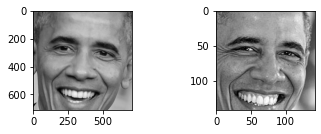

In [6]:
templatelist=[]
obama_face_template=obama_template('ObamaTemplate','ObamaTemplate1.jpg')
obama_face_template1=obama_template('ObamaTemplate','ObamaTemplate2.jpg')
templatelist=[obama_face_template,obama_face_template1]
for i in range (2):
    plt.subplot(2,2,i+1)
    plt.imshow(templatelist[i],'gray')

1 - No match
1 - No match
1 - No match
1 - No match
img_217.jpg - found a match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match
1 - No match


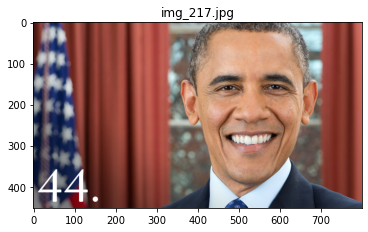

In [7]:
matchtempresize("Test",obama_face_template)

In [8]:
#Only for testing
#obamaimageDictionary = {foldertest : process_images_from_directory(os.path.join(testingDir,foldertest)) for foldertest in testlist}